<a href="https://colab.research.google.com/github/HKang42/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Harrison_Kang_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



**1) Write a function**
**def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):**
 - What is the probability that a person is drunk after one positive breathalyzer test?


---



$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

-	P(A|B) = Probability that a random person that tests positive is a drunk driver
-	P(A) = Probability someone is a drunk driver
-	P(B) = Probability someone tests positive
-	P(A∩B) = Probability of A and B (drunk driving and test positive)


In [0]:
# TODO - code!

import scipy.stats as stats

def prob_drunk_given_positive( prob_drunk_prior, false_pos, true_pos, truncate = 4):
  PA = prob_drunk_prior

  # numerator = perison is drunk and tests positive
  numerator = PA * true_pos

  # denominator = person tests positive
  # denominator = drunk and test positive + not drunk and test positive
  denominator = PA * true_pos + (1.0 - PA) * false_pos

  result = round(numerator/denominator, truncate)

  return result

In [13]:
prior = 1/1000
false_positive = 0.08
true_positive = 1.0


posterior1 = prob_drunk_given_positive(prior, false_positive, true_positive)

print ("The probability that a person is drunk after one positive breathalyzer test is:", str(posterior1 * 100) + "%")

The probability that a person is drunk after one positive breathalyzer test is: 1.24%


**What is the probability that a person is drunk after two positive breathalyzer tests?**

In [14]:
posterior2 = prob_drunk_given_positive(posterior1, false_positive, true_positive)

print ("The probability that a person is drunk after two positive breathalyzer test is:", str(posterior2 * 100) + "%")

# For some reason, the result won't be truncated if it's in a print statement like above. 
#print(posterior2)
#print("hi",posterior2, "hi")

The probability that a person is drunk after two positive breathalyzer test is: 13.569999999999999%


**How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?**

In [15]:
# Use a loop to run the prob_drunk_given_positive, using the previous posterior value as the prior probability argument

# counter used to track number of loops
i = 0

confidence = 0.95

prior = 1/1000
false_positive = 0.08
true_positive = 1.0

while True:
  i += 1

  posterior = prob_drunk_given_positive(prior, false_positive, true_positive)

  # stop once we reach the desired confidence level
  if posterior > confidence:
    break

  else:
    prior = posterior

  # Break the loop if it goes on for too long  
  if i == 100:
    break

posterior_percent = posterior * 100

print("After", i, "Breathalyzer test(s), the probability that a person is drunk beyond the legal limit is:", str(posterior_percent) + "%")

After 4 Breathalyzer test(s), the probability that a person is drunk beyond the legal limit is: 96.08%


**2) Explore scipy.stats.bayes_mvs**

Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general.

In [16]:
#help( stats.bayes_mvs )

# TODO - your code!

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Get data

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# define function for 

def conf_int(sample, confidence, truncate = True):

  # convert sample to array
  sample = np.array(sample)
  
  # get sameple size
  n = len(sample)

  # calculate degrees of freedom
  DoF = n-1

  # calculate mean of sample
  mean = np.mean(sample)

  # calculate standard deviation of sample
  std_dev = np.std(sample, ddof=1)
  
  # calculate standard error given standard dev. and sample size
  std_err = std_dev / np.sqrt(n)

  # get t-value given desired confidence level and degrees of freedom
  t = stats.t.ppf( (1 + confidence) / 2.0, DoF)

  # calculate margin of error
  margin_of_error = std_err * t

  # calculate upper and lower bounds
  upper = mean + margin_of_error
  lower = mean - margin_of_error

  # truncate values
  if truncate == True:
  
    mean = round(mean,3)
    upper = round(upper, 3)
    lower = round(lower, 3)
    margin_of_error = round(margin_of_error,3)

  return mean, upper, lower

In [0]:
# Generate sample

confidence = 0.95

sample_size = 10

sample = df['education-num'].sample(sample_size)

In [19]:
# get frequentist statistics
freq = conf_int(sample, confidence)

# get bayesian statistics
bayesian = stats.bayes_mvs(df['education-num'], alpha = confidence)

# put the desired values into a tuple (mean, upper limit, lower limit)
bayes = (bayesian[0][0], bayesian[0][1][0], bayesian[0][1][1])

print(freq)
print(bayes)

(10.8, 12.338, 9.262)
(10.0806793403151, 10.0527355615954, 10.108623119034801)


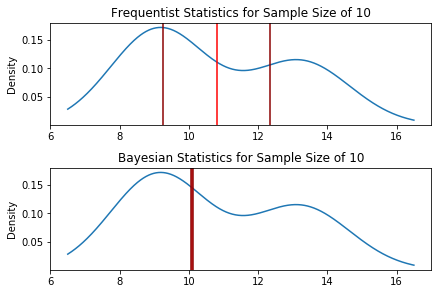

In [20]:
fig = plt.figure()
(ax1, ax2) = fig.subplots(2)

#ax1 = sample.plot.density()
ax1 = sample.plot(ax=ax1, kind = 'kde')

samp = str(sample_size)

ax1.set_title('Frequentist Statistics for Sample Size of ' + samp)

ax1.axvline(freq[0], color='red')
ax1.axvline(freq[1], color = 'darkred')
ax1.axvline(freq[2], color = 'darkred')

#ax2 = sample.plot.density()
ax2 = sample.plot(ax=ax2, kind = 'kde')

ax2.set_title('Bayesian Statistics for Sample Size of ' + samp)

ax2.axvline(bayes[0], color='red')
ax2.axvline(bayes[1], color = 'darkred')
ax2.axvline(bayes[2], color = 'darkred')


fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We can see from above graphs that the confidence interval for the Bayesian Statistics is much tighter when we use a sample size of 10.

Now let's try a larger sample size.

In [0]:
# Generate sample

confidence = 0.95
sample_size = 1000
sample = df['education-num'].sample(sample_size)

# get frequentist statistics
freq = conf_int(sample, confidence)

# get bayesian statistics
bayesian = stats.bayes_mvs(df['education-num'], alpha = confidence)

# put the desired values into a tuple (mean, upper limit, lower limit)
bayes = (bayesian[0][0], bayesian[0][1][0], bayesian[0][1][1])

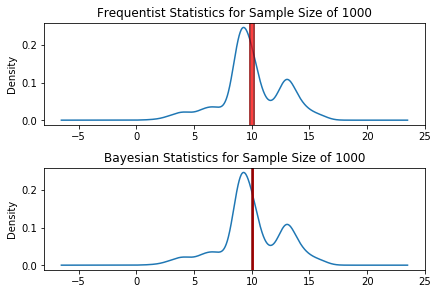

In [22]:
fig = plt.figure()
(ax1, ax2) = fig.subplots(2)

#ax1 = sample.plot.density()
ax1 = sample.plot(ax=ax1, kind = 'kde')

samp = str(sample_size)

ax1.set_title('Frequentist Statistics for Sample Size of ' + samp)

ax1.axvline(freq[0], color='red')
ax1.axvline(freq[1], color = 'darkred')
ax1.axvline(freq[2], color = 'darkred')

#ax2 = sample.plot.density()
ax2 = sample.plot(ax=ax2, kind = 'kde')

ax2.set_title('Bayesian Statistics for Sample Size of ' + samp)

ax2.axvline(bayes[0], color='red')
ax2.axvline(bayes[1], color = 'darkred')
ax2.axvline(bayes[2], color = 'darkred')


fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

With a much larger sample size, we see that the confidence interval for the Frequentist Statistics are much tighter like the Bayesian Confidence Interval.

**3) In your own words, summarize the difference between Bayesian and Frequentist statistics**



---


Frequentist statistics is built on sampling, is dependent on the probabilities for both observed and unobserved data, and never uses or gives probabilities to a hypothesis (only rejects or fails to reject).

In contrast, Bayesian statistics is built on prior probabilities (which can be very subjective), depends on prior probability and probability of observed data, and defines probabilities for hypotheses.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!